In [133]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression 
import numpy as np

In [134]:
hist=pd.read_csv('TOP500_history.csv')

/Users/workhard/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (30,31,35,36,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
hist_first=hist[hist['Rank']==1]
hist_last=hist[hist['Rank']==500]

In [136]:
train_first=pd.DataFrame()
train_last=pd.DataFrame()

train_first['year']=hist_first['Year']
train_last['year']=hist_last['Year']
train_first['month']=hist_first['Month']
train_last['month']=hist_last['Month']
train_first['RMax']=hist_first['RMax']*(1e-3)
train_last['RMax']=hist_last['RMax']*(1e-3)
train_first['RMax2']=hist_first['Rmax [TFlop/s]']
train_last['RMax2']=hist_last['Rmax [TFlop/s]']
train_first=train_first.reset_index()
train_last=train_last.reset_index()
del train_first['index']
del train_last['index']

for i in range(len(train_first)):
    if math.isnan(train_first.loc[i]['RMax'])==True:
        train_first['RMax'][i]=train_first.loc[i]['RMax2']
for i in range(len(train_last)):
    if math.isnan(train_last.loc[i]['RMax'])==True:
        train_last['RMax'][i]=train_last.loc[i]['RMax2']
        
del train_first['RMax2']
del train_last['RMax2']


label_first=train_first['RMax']*1e12
label_last=train_last['RMax']*1e12
label_first=label_first.append(pd.Series([415530*1e12]),ignore_index=True)
label_last=label_last.append(pd.Series([1228*1e12]),ignore_index=True)
train_first=train_first.append({'year':2020,'month':6},ignore_index=True)
train_last=train_last.append({'year':2020,'month':6},ignore_index=True)

del train_first['RMax']
del train_last['RMax']

/Users/workhard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/workhard/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
model_first=LinearRegression()
model_last=LinearRegression()
model_first=model_first.fit(X=train_first,y=np.log(label_first))
model_last=model_last.fit(X=train_last,y=np.log(label_last))



In [138]:
pred=pd.DataFrame(columns=['year','month'])
for i in range(0,5):
    pred=pred.append({'year':2020+i,'month':11},ignore_index=True)
    pred=pred.append({'year':2020+i+1,'month':6},ignore_index=True)
   

In [139]:
pred_first=model_first.predict(pred)
pred_last=model_last.predict(pred)

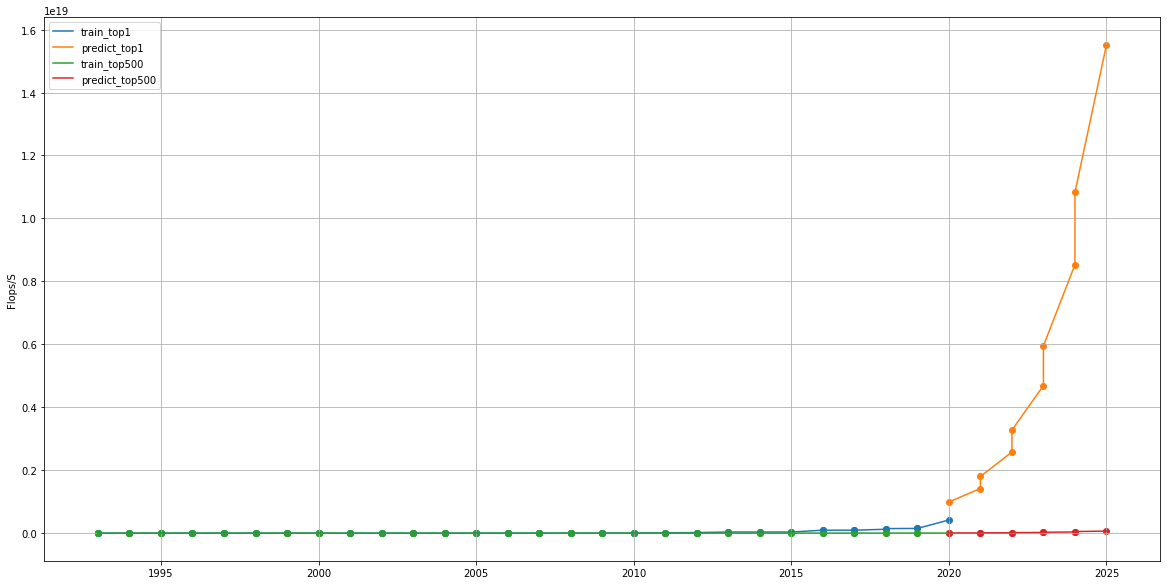

In [140]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(train_first['year'].values,label_first)
plt.scatter(train_first['year'].values,(label_first))
plt.plot(pred['year'].values,np.exp(pred_first))
plt.scatter(pred['year'].values,np.exp(pred_first))

plt.plot(train_last['year'].values,label_last)
plt.scatter(train_last['year'].values,(label_last))
plt.plot(pred['year'].values,np.exp(pred_last))
plt.scatter(pred['year'].values,np.exp(pred_last))
plt.legend(['train_top1','predict_top1','train_top500','predict_top500'])
plt.ylabel('Flops/S')

plt.show()

plt.close()
plt.clf()        
plt.cla()
plt.close()

In [141]:
print('Predictive for Top1:')
print('Year \t month \t TFlops/S ')
for i in range(0,len(pred)):

    print(pred.loc[i]['year'], '\t',pred.loc[i]['month'],'\t',np.exp(pred_first[i])*(1e-12))

Predictive for Top1:
Year 	 month 	 TFlops/S 
2020 	 11 	 989243.6849821872
2021 	 6 	 1417164.1009320763
2021 	 11 	 1799432.4079711903
2022 	 6 	 2577818.8421556125
2022 	 11 	 3273164.175837322
2023 	 6 	 4689047.640002983
2023 	 11 	 5953879.498071342
2024 	 6 	 8529368.864348331
2024 	 11 	 10830095.642384915
2025 	 6 	 15514905.970135337


In [142]:
print('Predictive for Top500:')
print('Year \t month \t TFlops/S ')
for i in range(0,len(pred)):

    print(pred.loc[i]['year'], '\t',pred.loc[i]['month'],'\t',np.exp(pred_last[i])*(1e-12))

Predictive for Top500:
Year 	 month 	 TFlops/S 
2020 	 11 	 5077.681193806959
2021 	 6 	 6624.140766385223
2021 	 11 	 8959.987798841401
2022 	 6 	 11688.843426606321
2022 	 11 	 15810.638417654296
2023 	 6 	 20625.92953112559
2023 	 11 	 27899.177184831642
2024 	 6 	 36396.15601784782
2024 	 11 	 49230.402152610266
2025 	 6 	 64224.02301317902
